In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv("df_norm.csv", 
                 index_col = 0)

In [3]:
class_names = df['CLASS']
class_names = class_names.tolist()
col_names = df.columns
class_label = np.unique(class_names)

In [4]:
df.shape

(200, 35)

In [23]:
X = df.drop('CLASS',axis=1)
Y = df['CLASS']

In [24]:
Y_bin = label_binarize(df['CLASS'], 
                       classes=class_label)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y_bin, 
                                                    test_size=0.2,
                                                    stratify=class_names)
y_true = np.argmax(y_test, axis = 1)

# Classifiers

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn1_res = knn.predict(X_test)
y_pred_knn1 = np.argmax(knn1_res, axis=1)
y_predp_knn1 = knn.predict_proba(X_test)
ac_knn = accuracy_score(y_true, y_pred_knn1)

In [10]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1))
y_pred_ovr_knn1 = clf.fit(X_train, y_train).predict_proba(X_test)

In [11]:
fpr_KNN1 = dict()
tpr_KNN1 = dict()
roc_auc_KNN1 = dict()
for i in range(class_label.shape[0]):
    fpr_KNN1[i], tpr_KNN1[i], _ = roc_curve(y_test[:, i], y_pred_ovr_knn1[:, i])
    roc_auc_KNN1[i] = auc(fpr_KNN1[i], tpr_KNN1[i])

In [10]:
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train,y_train)
RF100_res = RF.predict(X_test)
y_pred_RF100 = np.argmax(RF100_res, axis=1)
y_predp_RF100 = RF.predict_proba(X_test)
ac_rf = accuracy_score(y_true, y_pred_RF100)

In [13]:
RF_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 100))
y_pred_ovr_RF100 = RF_clf.fit(X_train, y_train).predict_proba(X_test)

In [14]:
fpr_RF100 = dict()
tpr_RF100 = dict()
roc_auc_RF100 = dict()
for i in range(class_label.shape[0]):
    fpr_RF100[i], tpr_RF100[i], _ = roc_curve(y_test[:, i], y_pred_ovr_RF100[:, i])
    roc_auc_RF100[i] = auc(fpr_RF100[i], tpr_RF100[i])

In [11]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_res = DT.predict(X_test)
y_pred_DT = np.argmax(DT_res, axis=1)
y_predp_DT = DT.predict_proba(X_test)
ac_dt = accuracy_score(y_true, y_pred_DT)

In [16]:
DT_clf = OneVsRestClassifier(tree.DecisionTreeClassifier())
y_pred_ovr_DT = DT_clf.fit(X_train, y_train).predict_proba(X_test)

In [17]:
fpr_DT = dict()
tpr_DT = dict()
roc_auc_DT = dict()
for i in range(class_label.shape[0]):
    fpr_DT[i], tpr_DT[i], _ = roc_curve(y_test[:, i], y_pred_ovr_DT[:, i])
    roc_auc_DT[i] = auc(fpr_DT[i], tpr_DT[i])

In [12]:
gb_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100,
                                                        learning_rate=0.5, 
                                                        max_features=None, 
                                                        max_depth=3, 
                                                        random_state=None))
y_predp_ovr_gb = gb_clf.fit(X_train, y_train).predict_proba(X_test)
y_pred_ovr_gb = gb_clf.fit(X_train, y_train).predict(X_test)
y_pred_gb = np.argmax(y_pred_ovr_gb, axis=1)
ac_gb = accuracy_score(y_true, y_pred_gb)

In [20]:
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
for i in range(class_label.shape[0]):
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test[:, i], y_pred_ovr_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

In [13]:
xgb_clf = OneVsRestClassifier(XGBClassifier(eval_metric='mlogloss',
                                                use_label_encoder=False,
                                                learning_rate=0.075))

y_predp_ovr_xgb = xgb_clf.fit(X_train, y_train).predict_proba(X_test)
y_pred_ovr_xgb = xgb_clf.fit(X_train, y_train).predict(X_test)
y_pred_xgb = np.argmax(y_pred_ovr_xgb, axis=1)
ac_xgb = accuracy_score(y_true, y_pred_xgb)

In [22]:
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(class_label.shape[0]):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test[:, i], y_pred_ovr_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

In [14]:
svm_clf = OneVsRestClassifier(svm.SVC(kernel='linear',
                                      probability=True))

y_predp_ovr_svm = svm_clf.fit(X_train, y_train).predict_proba(X_test)
y_pred_ovr_svm = svm_clf.fit(X_train, y_train).predict(X_test)
y_pred_svm = np.argmax(y_pred_ovr_svm, axis=1)
ac_svm = accuracy_score(y_true, y_pred_svm)

In [24]:
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(class_label.shape[0]):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test[:, i], y_pred_ovr_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

ROC curve for all

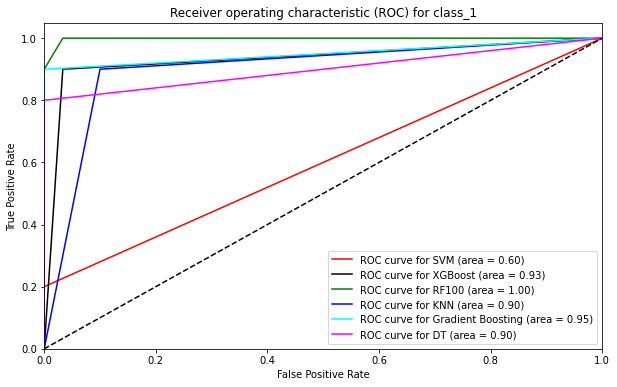

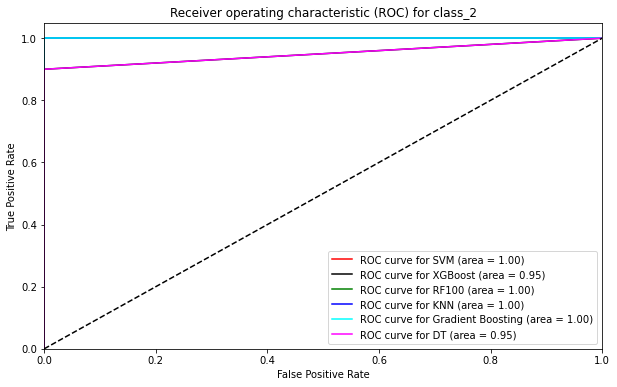

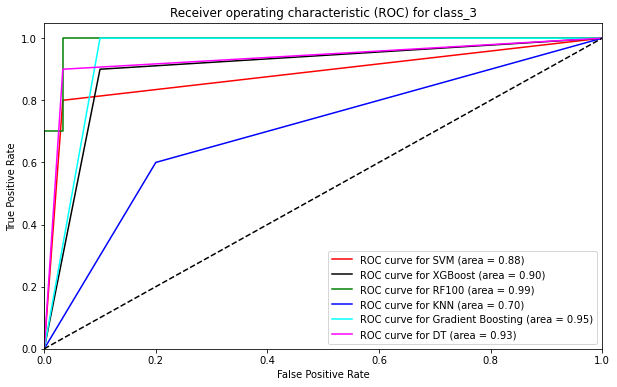

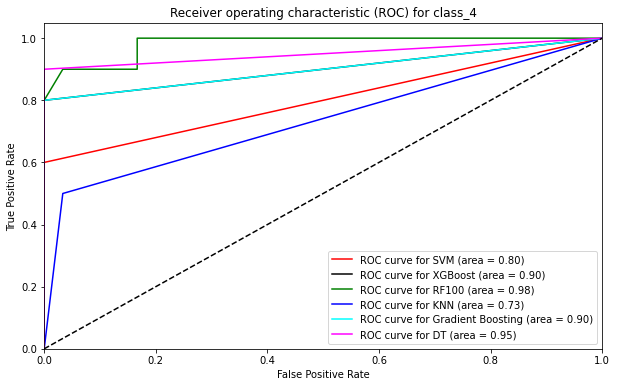

In [59]:
for i in range(class_label.shape[0]):
    plt.figure(figsize = (10,6))
    plt.plot(fpr_svm[i], 
             tpr_svm[i],
             color='red', 
             label='ROC curve for SVM (area = %0.2f)' % roc_auc_svm[i])
    plt.plot(fpr_xgb[i], 
             tpr_xgb[i],
             color='black', 
             label='ROC curve for XGBoost (area = %0.2f)' % roc_auc_xgb[i])
    plt.plot(fpr_RF100[i], 
             tpr_RF100[i],
             color='green', 
             label='ROC curve for RF100 (area = %0.2f)' % roc_auc_RF100[i])
    plt.plot(fpr_KNN1[i], 
             tpr_KNN1[i],
             color='blue', 
             label='ROC curve for KNN (area = %0.2f)' % roc_auc_KNN1[i])
    plt.plot(fpr_gb[i], 
             tpr_gb[i],
             color='cyan', 
             label='ROC curve for Gradient Boosting (area = %0.2f)' % roc_auc_gb[i])
    plt.plot(fpr_DT[i], 
             tpr_DT[i],
             color='magenta', 
             label='ROC curve for DT (area = %0.2f)' % roc_auc_DT[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for %s' % class_label[i])
    plt.legend(loc="lower right")
    plt.show()

In [16]:
import plotly.express as px

In [36]:
df_rplot = pd.DataFrame(dict(ac=[ac_xgb, ac_svm, ac_rf, ac_knn, ac_gb, ac_dt],
                             names_classif=['XGB','SVM', 'RF', 'KNN', 'GB', 'DT']))
fig = px.line_polar(df_rplot, 
                    r='ac', 
                    theta='names_classif', 
                    line_close=True, 
                    title='Radarplot - Accuracy')
fig.update_traces(fill='toself')
fig.show()

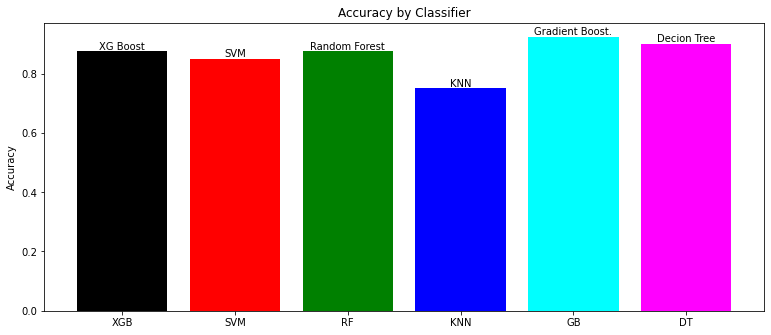

In [58]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
name_classifier=['XG Boost','SVM', 'Random Forest', 'KNN', 'Gradient Boost.', 'Decion Tree']
ac=[ac_xgb, ac_svm, ac_rf, ac_knn, ac_gb, ac_dt]

bar = ax.bar(name_class,ac, color=['black', 'red', 'green', 'blue', 'cyan', 'magenta'])
labels = name_classifier

opacity = 0.4
bar_width = 0.35

for rect, label in zip(bar, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, label, ha='center', va='bottom')
    
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Classifier')
plt.show()